In [3]:
# Libraries 
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Psss! ReadME! 
# The purpose of this code it to answer the following question using visualizations:
    #1. How is the number of flights booked per month distributed throughout the year?
    #2. Is there a relationship between flight distance and points accumulated by customers?
    #3. What is the distribution of customers by province or state?
    #4. How does the average salary compare between different educational levels of customers?
    #5. What is the proportion of customers with different types of loyalty cards?
    #6. How are customers distributed by marital status and gender?

In [5]:
df = pd.read_csv("data/customer_data_transformed.csv")

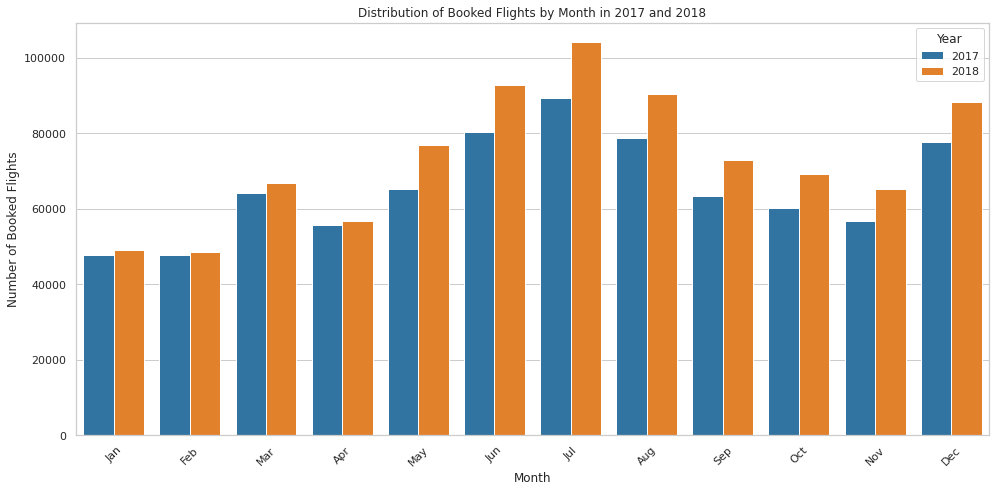

In [6]:
#1. How is the number of flights booked per month distributed throughout the year?

# Group by month and year, and sum the bookings
df_grouped = df.groupby(['year', 'month'])['flights_booked'].sum().reset_index()

# Ensure months are in string format for better visualization
df_grouped['month'] = df_grouped['month'].astype(int).astype(str).str.zfill(2)

# Create a combined column for month/year
df_grouped['month_year'] = df_grouped['month'] + '-' + df_grouped['year'].astype(str)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(14, 7))

# Create the grouped bar plot
ax = sns.barplot(x='month', y='flights_booked', hue='year', data=df_grouped, palette="tab10", dodge=True)

# Improve the presentation of the plot
plt.title('Distribution of Booked Flights by Month in 2017 and 2018')
plt.xlabel('Month')
plt.ylabel('Number of Booked Flights')

# Set the x-tick labels to be the abbreviated month names
ax.set_xticks(range(len(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Add a legend to identify the years
plt.legend(title='Year')

# Adjust the layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()

Correlation coefficient between distance and points accumulated: 0.99


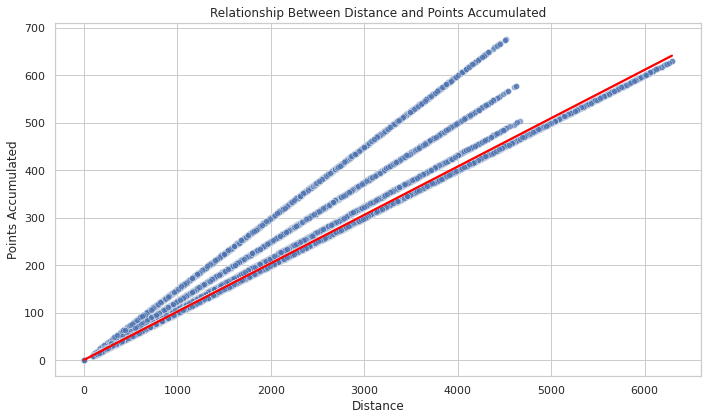

In [7]:
# 2. Is there a relationship between flight distance and points accumulated by customers?

correlation = df[['distance', 'points_accumulated']].corr().iloc[0, 1]

print(f'Correlation coefficient between distance and points accumulated: {correlation:.2f}')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='points_accumulated', data=df, alpha=0.6)

# Add a regression line to show the trend
sns.regplot(x='distance', y='points_accumulated', data=df, scatter=False, color='red')

# Improve the presentation of the plot
plt.title('Relationship Between Distance and Points Accumulated')
plt.xlabel('Distance')
plt.ylabel('Points Accumulated')

# Show the plot
plt.tight_layout()
plt.show()


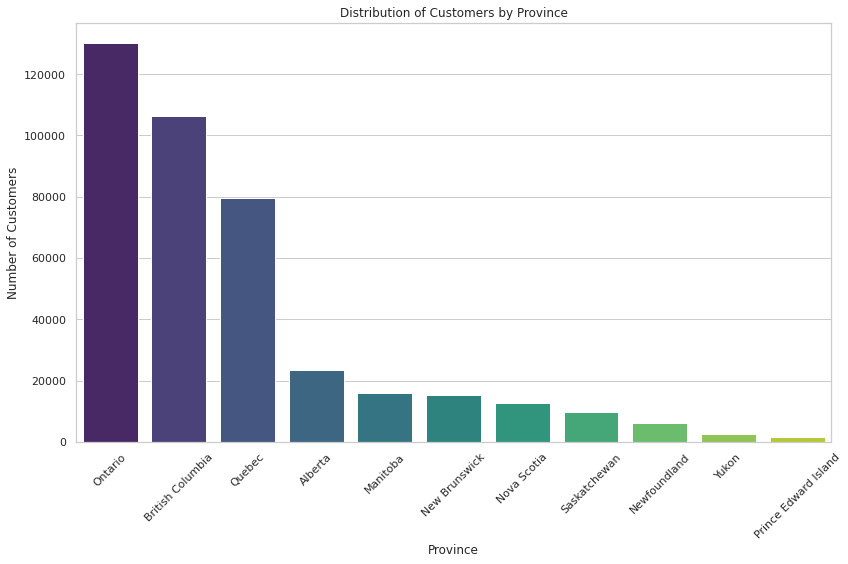

In [8]:
# 3.A What is the distribution of customers by province?

# Count the number of customers by province
distribution_province = df['province'].value_counts()

# Set the seaborn style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Create a bar plot for the distribution by province
sns.barplot(x=distribution_province.index, y=distribution_province.values, palette="viridis")

# Improve the presentation of the plot
plt.title('Distribution of Customers by Province')
plt.xlabel('Province')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

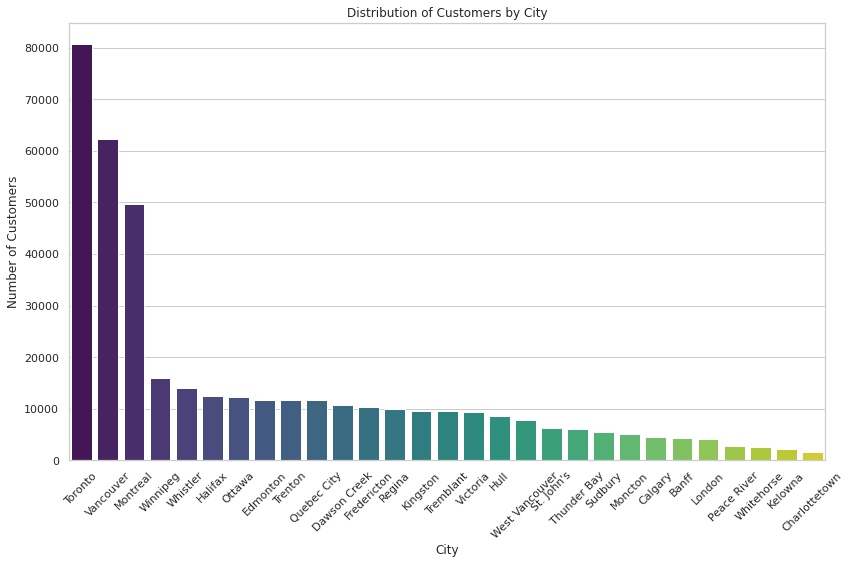

In [9]:
# 3.B What is the distribution of customers by state?

distribution_city = df['city'].value_counts()

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Create a bar plot for the distribution by city
sns.barplot(x=distribution_city.index, y=distribution_city.values, palette="viridis")

# Improve the presentation of the plot
plt.title('Distribution of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

education
High School or Below     61146.378165
Bachelor                 72599.080913
College                  73455.000000
Master                  103734.523724
Doctor                  178403.675202
Name: salary, dtype: float64


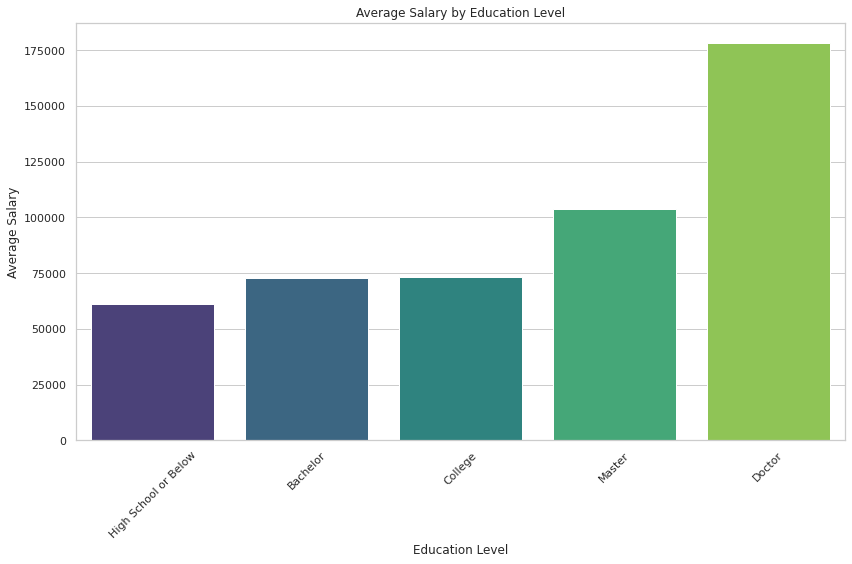

In [10]:
#4. How does the average salary compare across different educational levels of clients?

# Calculate the average salary by education level
average_salary_by_education = df.groupby('education')['salary'].mean().sort_values()

print(average_salary_by_education)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Create a bar plot for the average salary by education level
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values, palette="viridis")

# Improve the presentation of the plot
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

Star      0.455085
Nova      0.339021
Aurora    0.205895
Name: loyalty_card, dtype: float64


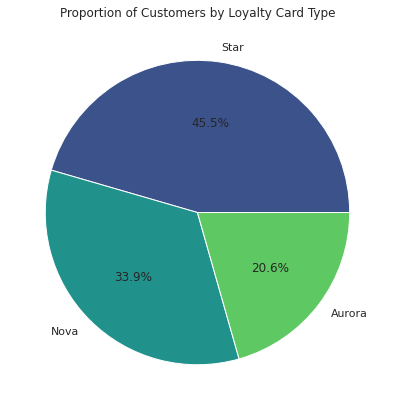

In [11]:
# 5. What is the proportion of customers with different types of loyalty cards?

# Count the number of customers with each type of loyalty card
loyalty_card_counts = df['loyalty_card'].value_counts()

# Calculate the proportion of each type of loyalty card
loyalty_card_proportions = loyalty_card_counts / loyalty_card_counts.sum()

print(loyalty_card_proportions)

# Create the figure and axis
plt.figure(figsize=(10, 7))

# Create a pie chart for the proportions of loyalty card types
plt.pie(loyalty_card_proportions, labels=loyalty_card_proportions.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(loyalty_card_proportions)))

# Improve the presentation of the plot
plt.title('Proportion of Customers by Loyalty Card Type')

# Show the plot
plt.show()



gender          Female    Male
marital_status                
Divorced         30634   30128
Married         117363  117482
Single           54760   53393


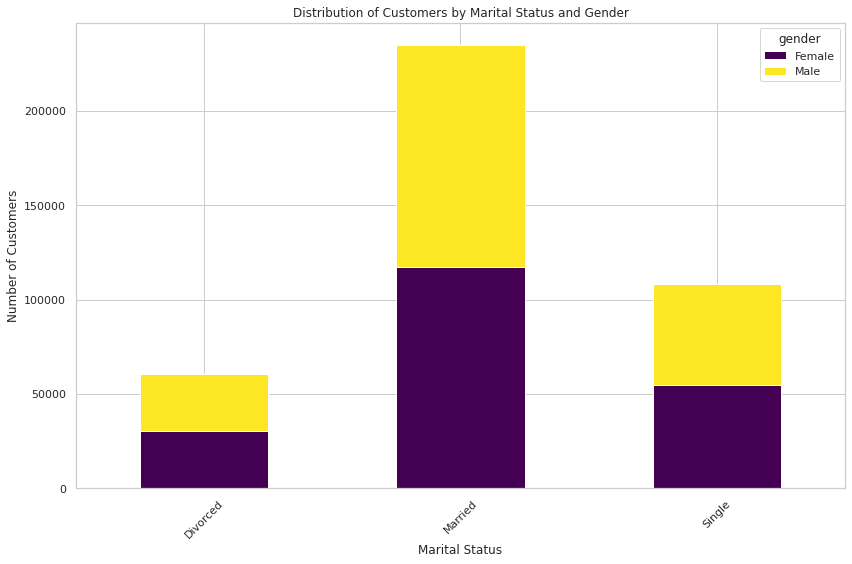

In [12]:
#6. How are customers distributed according to their marital status and gender?

# Calculate the distribution of customers by marital status and gender
distribution = pd.crosstab(df['marital_status'], df['gender'])

print(distribution)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Create a stacked bar plot for the distribution by marital status and gender
distribution.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# Improve the presentation of the plot
plt.title('Distribution of Customers by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()
